# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temps=[]
hum=[]
clouds=[]
wind=[]
lats=[]
lngs=[]
countries=[]
dates=[]
new_cities=[]

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key+"&q="
for city in cities:
    query_url=url+city
    try:
        response=requests.get(query_url).json()
        temps.append(response['main']['temp_max'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except KeyError:
        print(f"{city} is not found")              

bargal is not found
tsihombe is not found
ayios matthaios is not found
tumannyy is not found
belushya guba is not found
wulanhaote is not found
illoqqortoormiut is not found
grand river south east is not found
amderma is not found
taolanaro is not found
nizhneyansk is not found
mentok is not found
halalo is not found
mys shmidta is not found
barentsburg is not found
buqayq is not found
attawapiskat is not found
rungata is not found
miranorte is not found
kargapolye is not found
hihifo is not found
samusu is not found
karaul is not found
viligili is not found
phnum penh is not found
tabialan is not found
yalchiki is not found
afmadu is not found
ngukurr is not found
utiroa is not found
pokrovsk-uralskiy is not found
meyungs is not found
vaitupu is not found
samalaeulu is not found
kuche is not found
umzimvubu is not found
tabiauea is not found
cheuskiny is not found
blonduos is not found
sentyabrskiy is not found
solovetskiy is not found
warqla is not found
ozgon is not found
jiddah is 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
len(temps)

0

In [4]:
df=pd.DataFrame({'city':new_cities,'max temp':temps,'cloudiness':clouds, 'humidity':hum,'country':countries,'date':dates,'Latitude':lats,'Longitude':lngs,'Winds':wind})
df

,city,max temp,cloudiness,humidity,country,date,Latitude,Longitude,Winds
0,dalvik,21.20,20,79,IS,1615670451,65.9702,-18.5286,9.22
1,mandera,82.47,48,52,KE,1615670451,3.9366,41.8670,19.91
2,souillac,80.60,40,83,MU,1615670386,-20.5167,57.5167,6.91
3,ushuaia,46.40,75,57,AR,1615670451,-54.8000,-68.3000,33.38
4,punta arenas,51.80,20,46,CL,1615670407,-53.1500,-70.9167,23.02
...,...,...,...,...,...,...,...,...,...
559,roma,37.00,1,35,US,1615670618,43.2128,-75.4557,13.80
560,khash,53.80,0,48,IR,1615670618,28.2211,61.2158,5.99
561,maneadero,57.99,79,48,MX,1615670618,31.7167,-116.5667,1.99
562,yinchuan,53.08,88,37,CN,1615670619,38.4681,106.2731,2.33


In [ ]:
filename='cities_data.csv'
df.to_csv(filename,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
df.loc[df['humidity']>100]

,city,max temp,cloudiness,humidity,country,date,Latitude,Longitude,Winds


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

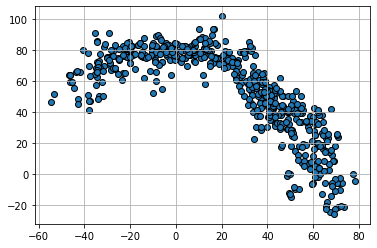

In [20]:
x_axis=df['Latitude']
y_axis=df['max temp']
plt.scatter(x_axis, y_axis,edgecolor='black')
plt.grid()
plt.savefig('latvstemp.png')

## Latitude vs. Humidity Plot

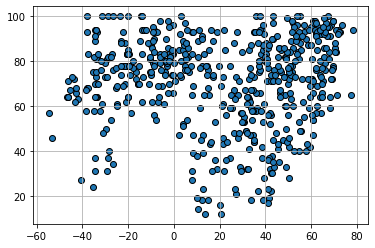

In [21]:
x_axis=df['Latitude']
y_axis=df['humidity']
plt.scatter(x_axis, y_axis,edgecolor='black')
plt.grid()
plt.savefig('latvshum.png')

## Latitude vs. Cloudiness Plot

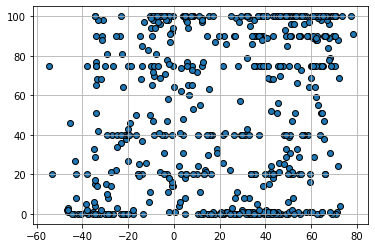

In [22]:
x_axis=df['Latitude']
y_axis=df['cloudiness']
plt.scatter(x_axis, y_axis,edgecolor='black')
plt.grid()
plt.savefig('latvscloud.png')

## Latitude vs. Wind Speed Plot

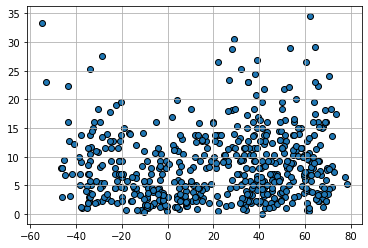

In [23]:
x_axis=df['Latitude']
y_axis=df['Winds']
plt.scatter(x_axis, y_axis,edgecolor='black')
plt.grid()
plt.savefig('latvswind.png')

## Linear Regression

In [25]:
def plot_regression(x_values,y_values,text_location):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
    predicted_y=slope*x_values+intercept
    line_equation=f"{round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,predicted_y,c='r')
    plt.annotate(line_equation,text_location,c='r')
    print(f"The r-value is: {rvalue}")

In [39]:
northern_hemisphere = df.loc[df["Latitude"] >= 0]
southern_hemisphere = df.loc[df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8765363235853515


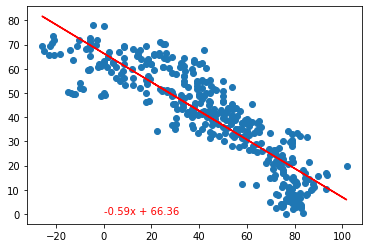

In [40]:
plot_regression(x_values=northern_hemisphere['max temp'],y_values=northern_hemisphere['Latitude'],text_location=(0,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.550184728284594


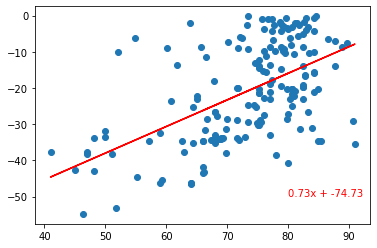

In [42]:
plot_regression(x_values=southern_hemisphere['max temp'],y_values=southern_hemisphere['Latitude'],text_location=(80,-50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2620800813323432


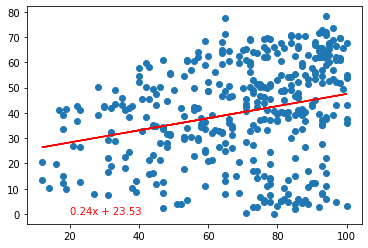

In [45]:
plot_regression(x_values=northern_hemisphere['humidity'],y_values=northern_hemisphere['Latitude'],text_location=(20,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3321630766373035


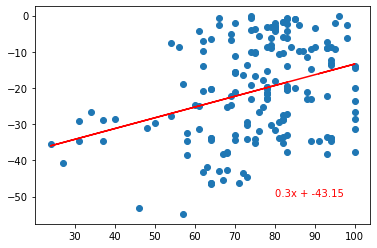

In [47]:
plot_regression(x_values=southern_hemisphere['humidity'],y_values=southern_hemisphere['Latitude'],text_location=(80,-50))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19760883926955986


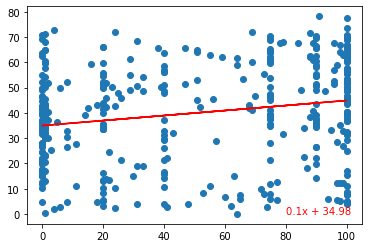

In [49]:
plot_regression(x_values=northern_hemisphere['cloudiness'],y_values=northern_hemisphere['Latitude'],text_location=(80,0))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.417438115424698


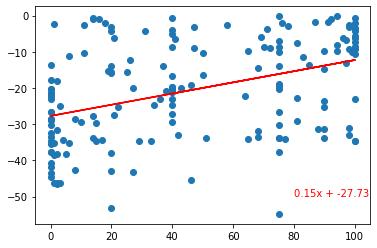

In [50]:
plot_regression(x_values=southern_hemisphere['cloudiness'],y_values=southern_hemisphere['Latitude'],text_location=(80,-50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11158420964586256


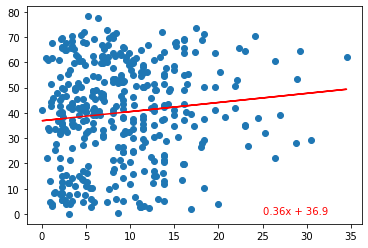

In [52]:
plot_regression(x_values=northern_hemisphere['Winds'],y_values=northern_hemisphere['Latitude'],text_location=(25,0))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3747615045085755


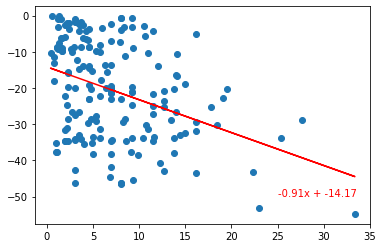

In [53]:
plot_regression(x_values=southern_hemisphere['Winds'],y_values=southern_hemisphere['Latitude'],text_location=(25,-50))